# Extracting Info from Brochures

Testing out different python packages along with CV models

In [1]:
pdf_path = "pdfs/MAXIMA_KC13_2025_QPRZ.pdf"


In [ ]:
import pdfplumber


with pdfplumber.open(pdf_path) as pdf:
    text = "\n".join(page.extract_text() for page in pdf.pages if page.extract_text())

print(text)


TĪRI IZDEVĪGI!
1499 39,99 €
€
-63%
Veļas mazgāšanas
kapsulas PERSIL
25.03.–07.04.2025. 1 iepak./68 gab.
+ K2R 3 m.r.,
divi veidi
599 11,99 €
(0,22 €/gab.)
€
-50%
Trauku mazgāšanas
līdzeklis FAIRY LEMON
1 iepak./2x 1350 ml
(2,22 €/l)
Piedāvājums spēkā no 13
Ar produktu piedāvājumu iepazīsties 2.-7. lpp.
25.03. līdz 31.03.2025.
079 1,29 € 699 11,99 € % N T e O dēļ P as
€
€ -42%
-39%
Garie gurķi Siers
plēvē % N T e O dēļ P as MAASDAM
1 gab. 1 kg, 45%
199 2,99 €
099 1,99 €
€
-33%
€
-50%
Tomāti
mini MIX % N T e O dēļ P as Mazie apelsīni
spainītī NAVELINA % N T e O dēļ P as
500 g (3,98 €/kg) 1 kg
249 % N T e O dēļ P as 089 1,79 € % N T e O dēļ P as 129 2,29 € % N T e O dēļ P as
€ € €
-50% -44%
999
Raudzēts piena Skābais krējums
€ produkts SMILTENE
LAKTO 400 g, 20%
Saldējums 450 g, (3,23 €/kg)
COOKIE DOUGH četri veidi
BEN&JERRY’S (1,98 €/kg)
406 g (6,13 €/kg;
24,61 €/kg)
099 % N T e O dēļ P as 139 % N T e O dēļ P as 159 2,99 € % N T e O dēļ P as
€ € €
-47%
no
236 279
Gāzēts dzēriens
€ € COCA-

In [6]:
from PyPDF2 import PdfReader


reader = PdfReader(pdf_path)
text = "\n".join(page.extract_text() for page in reader.pages if page.extract_text())

print(text)


25.03.–07.04.2025.
Ar produktu piedāvājumu iepazīsties 2.-7. lpp.
Konservētā kaķu 
barība FELIX 1 iepak./4x 85 g, trīs veidi (2,91 €/kg; no 6,94 €/kg)099
 € 
236 
€ 
no
1 pirkums, 1x dienā līdz 
5 gab. no katra veida!
199
€
Tomāti 
mini MIX spainītī 500 g (3,98 €/kg)2,99 €
-33%
%Nedēļas
TOP
%Nedēļas
TOP
%Nedēļas
TOP%Nedēļas
TOP
%Nedēļas
TOP%Nedēļas
TOP
%Nedēļas
TOP129
€
Skābais krējums 
SMILTENE 400 g, 20% (3,23 €/kg)2,29 €
-44%
 089
€
Raudzēts piena 
produkts LAKTO 450 g, četri veidi (1,98 €/kg)1,79 €
-50%
Čipsi ĀDAŽU DRAUGU PAKA 180 g, trīs veidi (7,72 €/kg; 15,50 €/kg)139
 € 
279 
€ 
%Nedēļas
TOP
Saldējums 
COOKIE DOUGH BEN&JERRY’S 406 g (6,13 €/kg; 24,61 €/kg)249
 € 
999 
€ 
159
€
Gāzēts dzēriens 
COCA-COLA vai FANTA2 l, trīs veidi (0,80 €/l)2,99 €
-47%079
€
Garie gurķi 
plēvē1 gab.1,29 €
-39%
%Nedēļas
TOP
099
€
Mazie apelsīni 
NAVELINA 1 kg1,99 €
-50%
%Nedēļas
TOP1499
€39,99 €
-63%
Veļas mazgāšanas 
kapsulas PERSIL 1 iepak./68 gab. + K2R 3 m.r., divi veidi(0,22 €/gab.)
599€11,99 €

In [3]:
import cv2
import easyocr
import numpy as np
from pdf2image import convert_from_path
from ultralytics import YOLO

# Load YOLO model (fine-tune on grocery brochures for better results)
model = YOLO("yolov8n.pt")  # You can replace with a custom-trained model

# Initialize EasyOCR
reader = easyocr.Reader(['en'])  # Adjust language as needed

def pdf_to_images(pdf_path):
    """Convert PDF to images."""
    images = convert_from_path(pdf_path)
    return [np.array(img) for img in images]

def detect_text_regions(image):
    """Detect text regions using YOLO."""
    results = model(image)
    bboxes = []
    for result in results:
        for box in result.boxes.xyxy:  # YOLO returns bounding boxes in xyxy format
            bboxes.append([int(i) for i in box])
    return bboxes

def extract_text(image, bboxes):
    """Extract text from detected regions."""
    extracted_data = []
    for box in bboxes:
        x1, y1, x2, y2 = box
        roi = image[y1:y2, x1:x2]  # Crop detected region
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        text = reader.readtext(gray, detail=0)  # Extract text
        extracted_data.append(" ".join(text))
    return extracted_data

def process_pdf(pdf_path):
    """Full pipeline: PDF -> Images -> Text Extraction"""
    images = pdf_to_images(pdf_path)
    all_data = []

    for img in images:
        bboxes = detect_text_regions(img)
        text_data = extract_text(img, bboxes)
        all_data.append(text_data)

    return all_data

# Example usage
  # Replace with your PDF file
extracted_text = process_pdf(pdf_path)

# Print results
for i, page_text in enumerate(extracted_text):
    print(f"\nPage {i+1}:")
    for item in page_text:
        print(item)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



0: 640x480 2 bottles, 1 refrigerator, 47.8ms
Speed: 2.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 5 bottles, 27.0ms
Speed: 1.3ms preprocess, 27.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 32 bottles, 1 refrigerator, 27.7ms
Speed: 1.3ms preprocess, 27.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 18 bottles, 1 refrigerator, 28.6ms
Speed: 1.8ms preprocess, 28.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 18 bottles, 1 refrigerator, 28.6ms
Speed: 1.9ms preprocess, 28.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 3 refrigerators, 2 books, 28.3ms
Speed: 1.6ms preprocess, 28.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


KeyboardInterrupt: 

In [5]:
import pytesseract
from PIL import Image


In [ ]:
from pdf2image import convert_from_path

In [8]:
def pdf_to_images(pdf_path):
    """Convert PDF to images."""
    images = convert_from_path(pdf_path)
    return [np.array(img) for img in images]

In [11]:
data = convert_from_path(pdf_path)

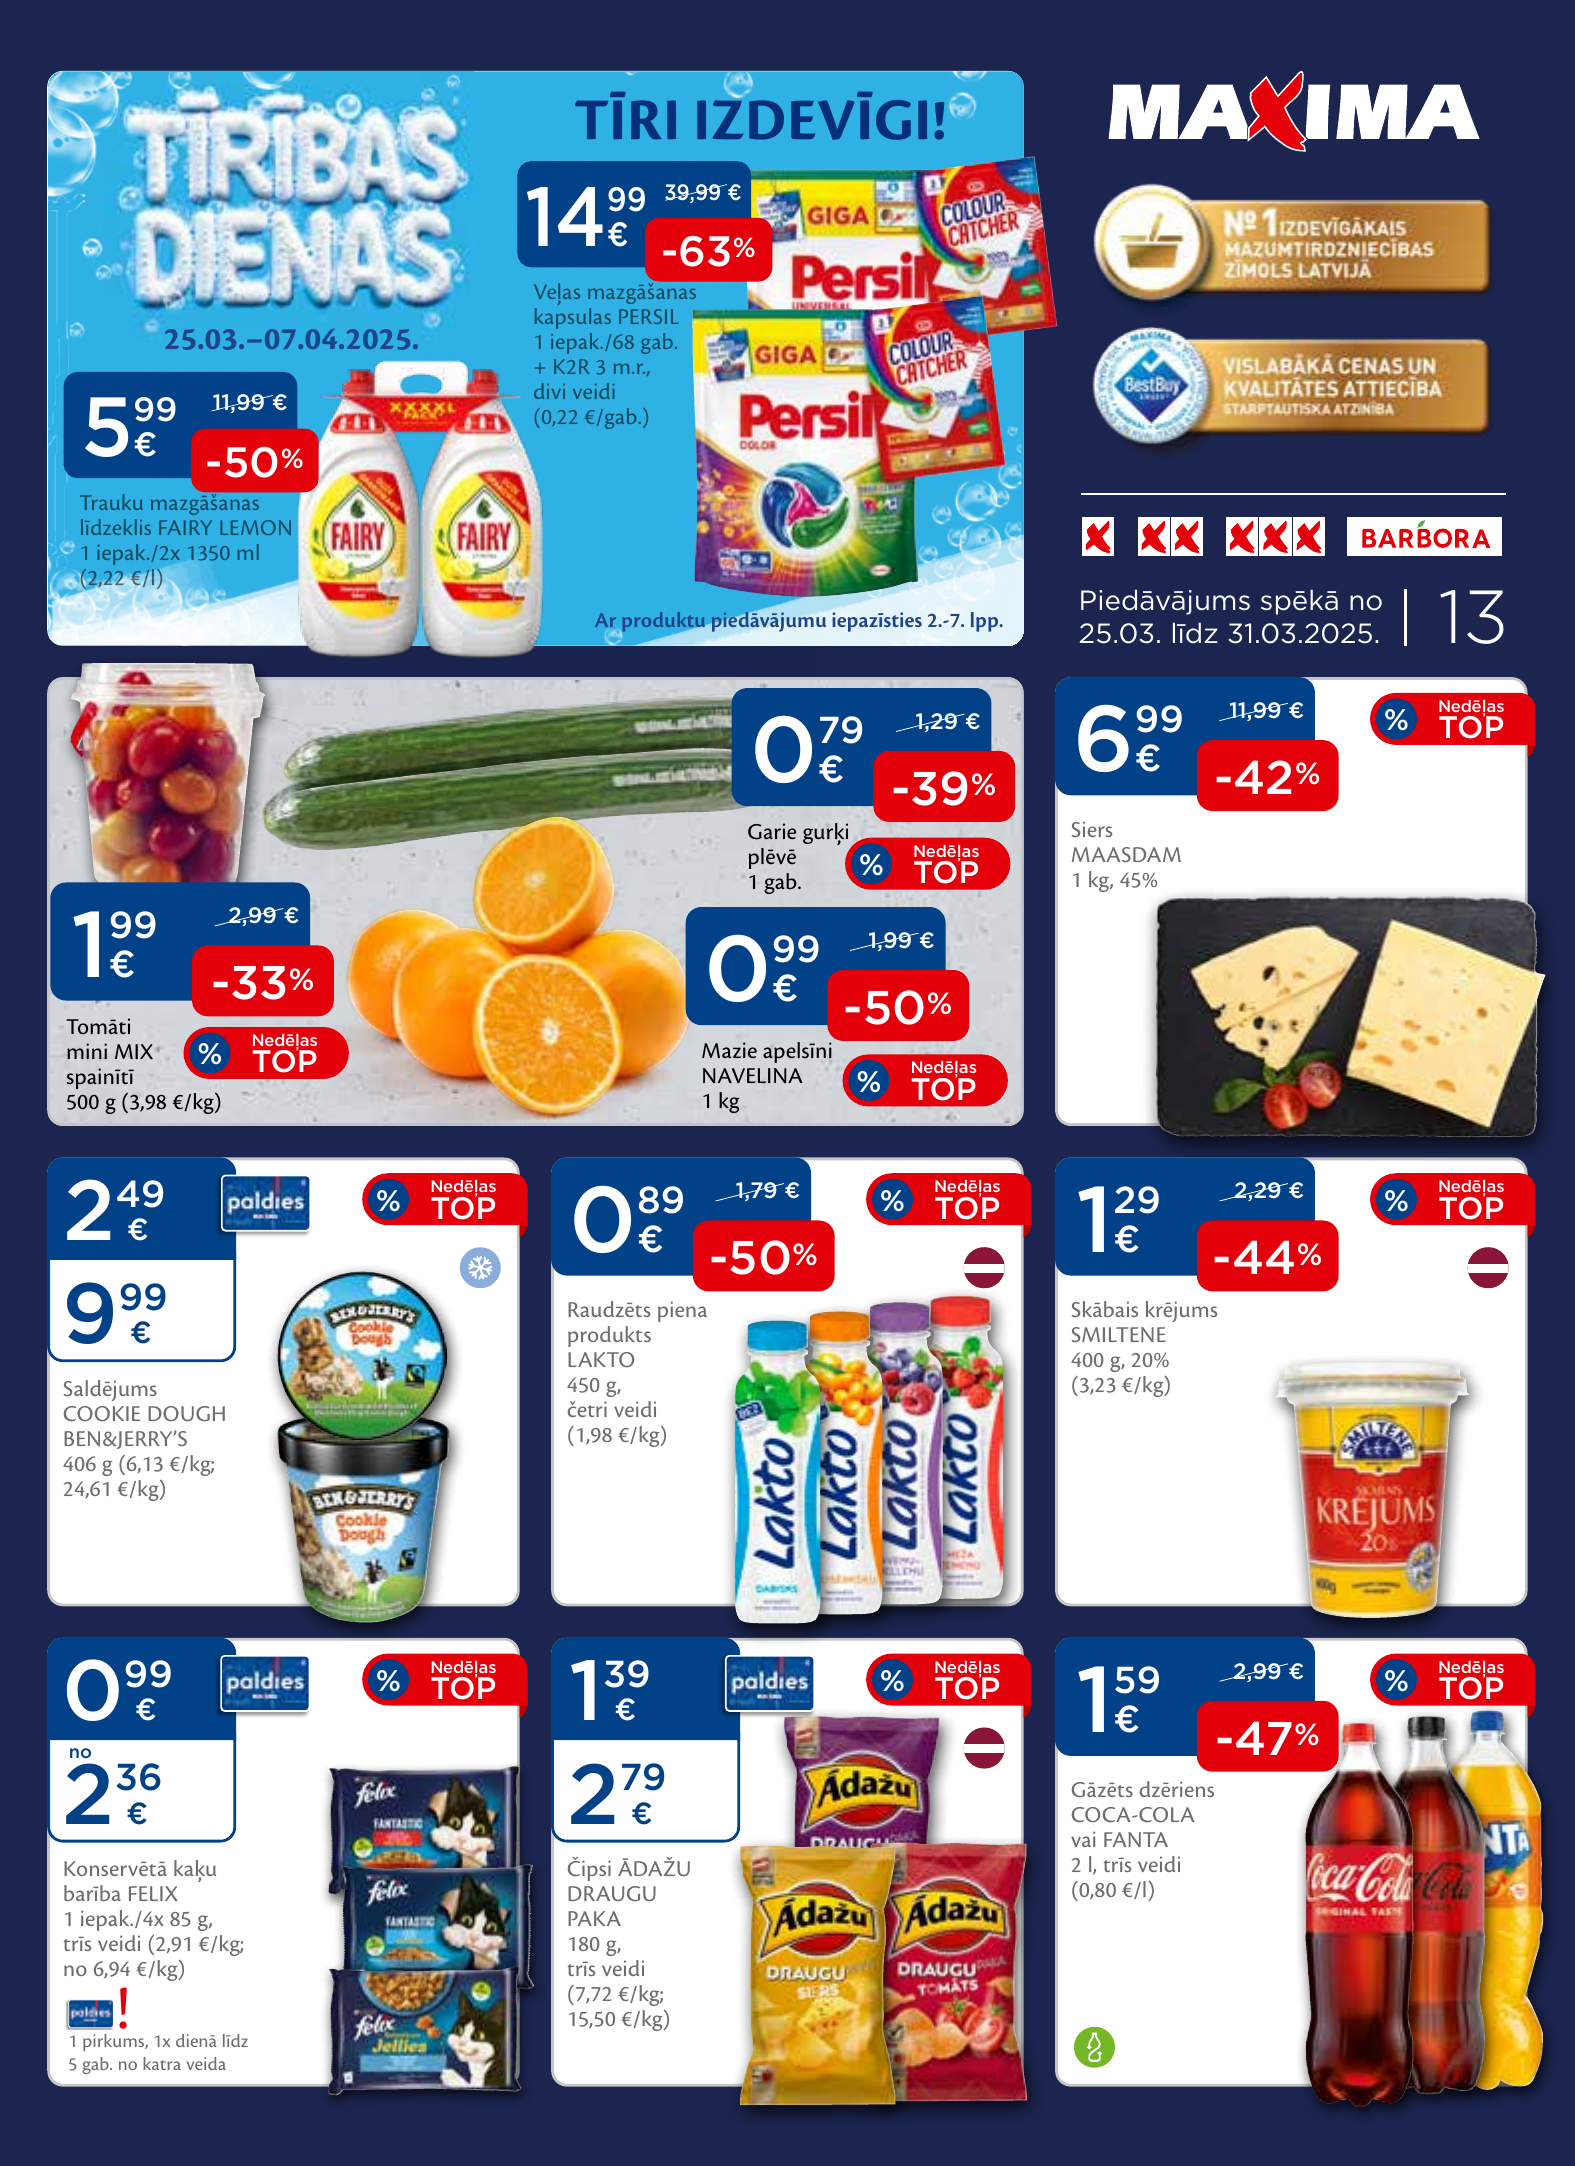

In [12]:
data[0]

In [16]:
text = pytesseract.image_to_string(data[0], lang="lav")


In [17]:
text

'Veļas mazgāšanas\nkapsulas PERSIL\n\n1 iepak./68 gab.\n+ K2R 3 m.r.,\n\ndivi veidi\n\n(0,22 €/gab.)\n\n"\n— —\n\n25.03.—07.04.2025.\n\no0 oA A\n< -50+ M\n\n—" — — w\n\nTrauku mazgāšanas\nlīdzeklis FAIRY LEMON\n1 iepak./2x 1350 ml\n77el)\n\nGarie gurķi\nplēvē\n1 gab.\n\nTomāti\nmini MIX* 78\nspainītī\n\n500 g (3,98 €/kg)\n\nMazie apelsīni\nNAVELINA\n1kg\n\nTOP\n\nNedēļas\n\n%\n\nRaudzēts piena\nprodukts\nLAKTO\n\n450 g,\n\nSaldējums\nCOOKIE DOUGH\nBEN8JERRY\'S\n406 g (6,13 €/kg;\n24,61 €/kg)\n\nčetri veidi\n(1,98 €/kg)\n\nČipsi ĀDAŽU\nDRAUGU\nPAKA\n\nKonservētā kaķu\nbarība FELIX\n\n1 iepi: x 85 g,\n\na\n\ntrīs veidi (2,91 €/kg; 180 g, bam\nno 6,94 €/kg) trīs veidi\nTOMĀTS\n\n\' (7,72 €/kg;\nZ. 15,50 €/kg)\n1 pirkums, 1x dienā līdz\n5 gab. no katra veida\n\nDRAUGU”” | \\\n\nN Ā\n\n"! 1llDEVIGAKAlS\nMAZUMTIRDZNIECĪBAS\nZIMOLS LATVIJA\n\nVISLABĀKĀ CENAS UN\nIWALITĀTES ATTIECĪBA\n\nSTARPTAUTISKMA ATZIMĪGA\n\nCA K K\n13\n\nNedēļas\n\nPiedāvājums spēkā no\n25.03. līdz 31.03.2025.\n\nSiers\n